<a href="https://colab.research.google.com/github/jsaulme/Aprendizaje_Automatico_MCD/blob/main/tareas/06_Clasificacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importar las bibliotecas necesarias
import os
import glob
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree


In [ ]:
# Cargar el dataset
url = "https://raw.githubusercontent.com/jsaulme/datasets/main/Global_superstore2018_procesado.csv"
data = pd.read_csv(url)
data.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,State,...,Profit,Shipping Cost,Order Priority,Order Year,Order Month,Order Day,Ship Day,Ship Month,Ship Year,Delivery Time
0,MX-2017-SC2057582-43010,2017-10-02,2017-10-06,Standard Class,SC-2057582,Sonia Cooley,Consumer,0,Mexico City,Distrito Federal,...,4.56,2.033,Medium,2017,10,2,6,10,2017,4
1,MX-2015-KW1657028-42292,2015-10-15,2015-10-20,Standard Class,KW-1657028,Kelly Williams,Consumer,0,Dos Quebradas,Risaralda,...,90.72,13.449,Medium,2015,10,15,20,10,2015,5
2,MX-2015-KW1657028-42292,2015-10-15,2015-10-20,Standard Class,KW-1657028,Kelly Williams,Consumer,0,Dos Quebradas,Risaralda,...,54.08,9.627,Medium,2015,10,15,20,10,2015,5
3,MX-2015-KW1657028-42292,2015-10-15,2015-10-20,Standard Class,KW-1657028,Kelly Williams,Consumer,0,Dos Quebradas,Risaralda,...,4.96,1.371,Medium,2015,10,15,20,10,2015,5
4,MX-2015-KW1657028-42292,2015-10-15,2015-10-20,Standard Class,KW-1657028,Kelly Williams,Consumer,0,Dos Quebradas,Risaralda,...,11.44,3.787,Medium,2015,10,15,20,10,2015,5


In [ ]:
data.dtypes

Order ID           object
Order Date         object
Ship Date          object
Ship Mode          object
Customer ID        object
Customer Name      object
Segment            object
Postal Code         int64
City               object
State              object
Country            object
Region             object
Market             object
Product ID         object
Product Name       object
Sub-Category       object
Category           object
Sales             float64
Quantity            int64
Discount          float64
Profit            float64
Shipping Cost     float64
Order Priority     object
Order Year          int64
Order Month         int64
Order Day           int64
Ship Day            int64
Ship Month          int64
Ship Year           int64
Delivery Time       int64
dtype: object

In [ ]:
#data.select_dtypes(include=['number'])
data.select_dtypes(include=["number"]).columns

Index(['Postal Code', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Shipping Cost', 'Order Year', 'Order Month', 'Order Day', 'Ship Day',
       'Ship Month', 'Ship Year', 'Delivery Time'],
      dtype='object')

In [ ]:
# Preprocesamiento de datos
# Crear una nueva columna para indicar si el profit es negativo o no
data['Profit_Negative'] = data['Profit'] < 0

# Definir las características (features) y la variable objetivo (target)
X = data[['Sales', 'Quantity', 'Discount', 'Profit',
       'Shipping Cost']]     # Definir las características relevantes
y = data['Profit_Negative']  # Definir la variable objetivo

data.head().iloc[:,10:]

,Country,Region,Market,Product ID,Product Name,Sub-Category,Category,Sales,Quantity,Discount,...,Shipping Cost,Order Priority,Order Year,Order Month,Order Day,Ship Day,Ship Month,Ship Year,Delivery Time,Profit_Negative
0,Mexico,Central America,LATAM,OFF-LA-4658,"Hon File Folder Labels, Adjustable",Labels,Office Supplies,13.08,3,0.0,...,2.033,Medium,2017,10,2,6,10,2017,4,False
1,Colombia,South America,LATAM,FUR-FU-6238,"Tenex Clock, Durable",Furnishings,Furniture,252.16,8,0.0,...,13.449,Medium,2015,10,15,20,10,2015,5,False
2,Colombia,South America,LATAM,FUR-BO-4845,"Ikea 3-Shelf Cabinet, Mobile",Bookcases,Furniture,193.28,2,0.0,...,9.627,Medium,2015,10,15,20,10,2015,5,False
3,Colombia,South America,LATAM,OFF-BI-3720,"Cardinal Binder, Clear",Binders,Office Supplies,35.44,4,0.0,...,1.371,Medium,2015,10,15,20,10,2015,5,False
4,Colombia,South America,LATAM,OFF-AR-5905,"Sanford Canvas, Water Color",Art,Office Supplies,71.60,2,0.0,...,3.787,Medium,2015,10,15,20,10,2015,5,False


In [ ]:
# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Normalizar características si es necesario
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Inicializar los clasificadores
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'Linear Discriminant Analysis': LinearDiscriminantAnalysis(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

# Entrenar y evaluar los modelos
for clf_name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    # Medir la precisión del modelo
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy of {clf_name}: {accuracy}')

    # Mostrar reporte de clasificación
    print(f'Classification Report of {clf_name}:')
    print(classification_report(y_test, y_pred))

    # Mostrar matriz de confusión
    print(f'Confusion Matrix of {clf_name}:')
    print(confusion_matrix(y_test, y_pred))
    print('\n')


Accuracy of Logistic Regression: 0.9756287775394814
Classification Report of Logistic Regression:
              precision    recall  f1-score   support

       False       0.98      0.99      0.98      7776
        True       0.97      0.93      0.95      2482

    accuracy                           0.98     10258
   macro avg       0.97      0.96      0.97     10258
weighted avg       0.98      0.98      0.98     10258

Confusion Matrix of Logistic Regression:
[[7700   76]
 [ 174 2308]]


Accuracy of Naive Bayes: 0.9329303957886528
Classification Report of Naive Bayes:
              precision    recall  f1-score   support

       False       0.94      0.97      0.96      7776
        True       0.91      0.80      0.85      2482

    accuracy                           0.93     10258
   macro avg       0.92      0.89      0.90     10258
weighted avg       0.93      0.93      0.93     10258

Confusion Matrix of Naive Bayes:
[[7576  200]
 [ 488 1994]]


Accuracy of Linear Discriminant An

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Definir umbral para determinar si el desempeño fue "bueno"
good_threshold = 0.8  # Por ejemplo, un 80% de precisión

for clf_name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    # Medir las métricas de desempeño
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Determinar si el desempeño fue "bueno" o "no tan bueno"
    performance = "bueno" if accuracy >= good_threshold else "no tan bueno"

    # Imprimir resultados
    print(f'### Evaluación del clasificador: {clf_name} ###')
    print(f'Precisión: {precision:.2f}')
    print(f'Recall: {recall:.2f}')
    print(f'F1-score: {f1:.2f}')
    print(f'Exactitud (Accuracy): {accuracy:.2f}')
    print(f'Desempeño: {performance}')
    print(f'Reporte de clasificación de {clf_name}:')
    print(classification_report(y_test, y_pred))
    print(f'Matriz de confusión de {clf_name}:')
    print(confusion_matrix(y_test, y_pred))
    print('\n')


### Evaluación del clasificador: Logistic Regression ###
Precisión: 0.97
Recall: 0.93
F1-score: 0.95
Exactitud (Accuracy): 0.98
Desempeño: bueno
Reporte de clasificación de Logistic Regression:
              precision    recall  f1-score   support

       False       0.98      0.99      0.98      7776
        True       0.97      0.93      0.95      2482

    accuracy                           0.98     10258
   macro avg       0.97      0.96      0.97     10258
weighted avg       0.98      0.98      0.98     10258

Matriz de confusión de Logistic Regression:
[[7700   76]
 [ 174 2308]]


### Evaluación del clasificador: Naive Bayes ###
Precisión: 0.91
Recall: 0.80
F1-score: 0.85
Exactitud (Accuracy): 0.93
Desempeño: bueno
Reporte de clasificación de Naive Bayes:
              precision    recall  f1-score   support

       False       0.94      0.97      0.96      7776
        True       0.91      0.80      0.85      2482

    accuracy                           0.93     10258
   macro a

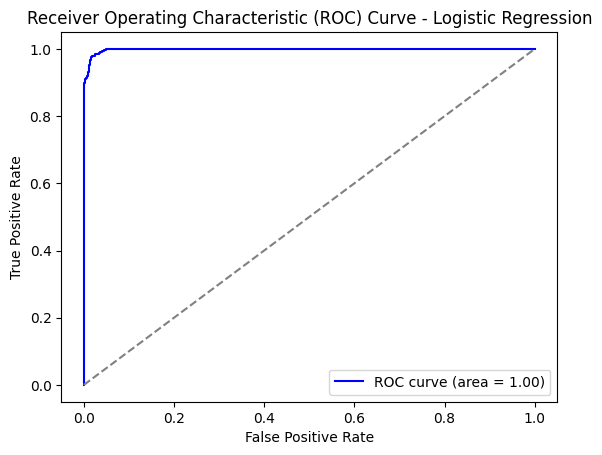

In [ ]:
# Entrenar el modelo
logistic_regression = classifiers['Logistic Regression']
logistic_regression.fit(X_train, y_train)

# Obtener las probabilidades predichas
y_pred_prob = logistic_regression.predict_proba(X_test)[:, 1]

# Calcular la curva ROC y el AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc = roc_auc_score(y_test, y_pred_prob)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Logistic Regression')
plt.legend(loc="lower right")
plt.show()


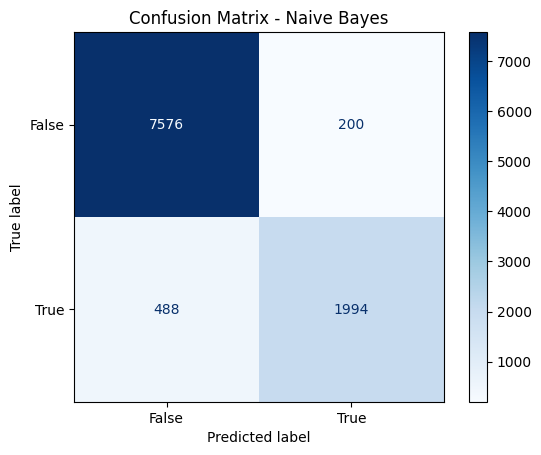

In [ ]:
# Inicializar y entrenar el modelo Naive Bayes
naive_bayes = classifiers['Naive Bayes']
naive_bayes.fit(X_train, y_train)

# Obtener las predicciones
y_pred = naive_bayes.predict(X_test)

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Graficar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['False', 'True'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Naive Bayes')
plt.show()

(10258, 1)


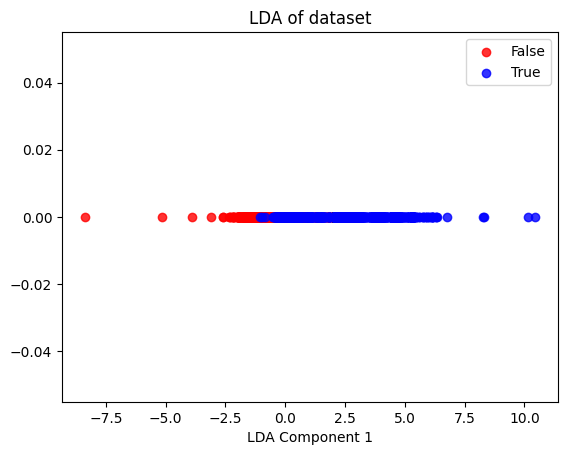

In [ ]:
# Entrenar el modelo
lda = classifiers['Linear Discriminant Analysis']
lda.fit(X_train, y_train)

# Transformar los datos
X_r2 = lda.transform(X_test)

# Verificar la forma de X_r2
print(X_r2.shape)

# Graficar la discriminación entre clases
plt.figure()

if X_r2.shape[1] == 1:
    # Si solo hay una dimensión, graficar en una dimensión
    for color, i, target_name in zip(['red', 'blue'], [0, 1], ['False', 'True']):
        plt.scatter(X_r2[y_test == i], np.zeros_like(X_r2[y_test == i]), alpha=.8, color=color, label=target_name)
    plt.xlabel('LDA Component 1')
else:
    # Si hay más de una dimensión, graficar en dos dimensiones
    for color, i, target_name in zip(['red', 'blue'], [0, 1], ['False', 'True']):
        plt.scatter(X_r2[y_test == i, 0], X_r2[y_test == i, 1], alpha=.8, color=color, label=target_name)
    plt.xlabel('LDA Component 1')
    plt.ylabel('LDA Component 2')

plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of dataset')
plt.show()


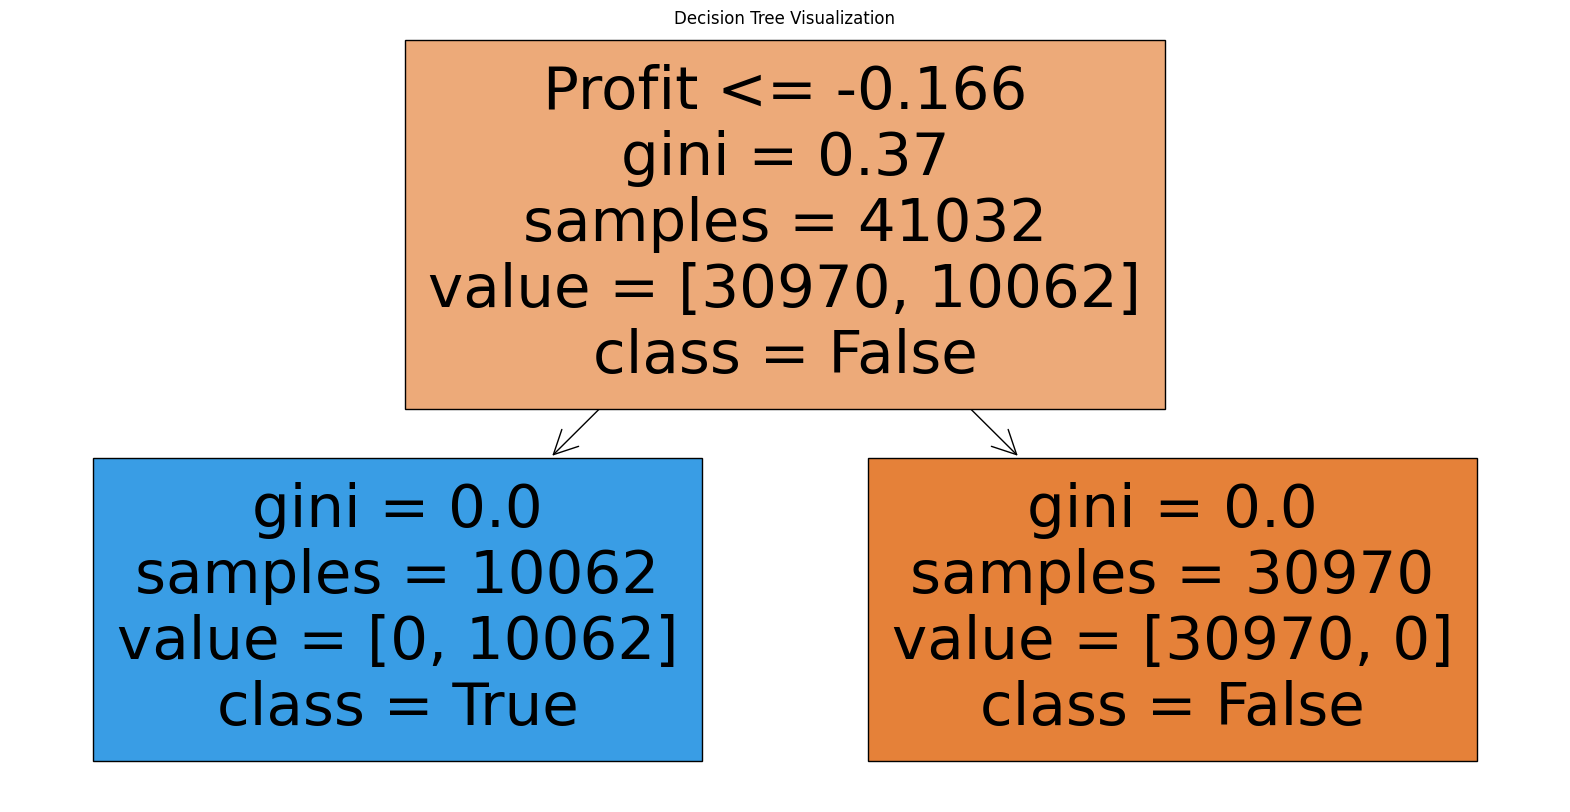

In [ ]:
# Entrenar el modelo
decision_tree = classifiers['Decision Tree']
decision_tree.fit(X_train, y_train)

# Graficar el árbol de decisión
plt.figure(figsize=(20,10))
plot_tree(decision_tree, filled=True, feature_names=X.columns, class_names=['False', 'True'])
plt.title('Decision Tree Visualization')
plt.show()

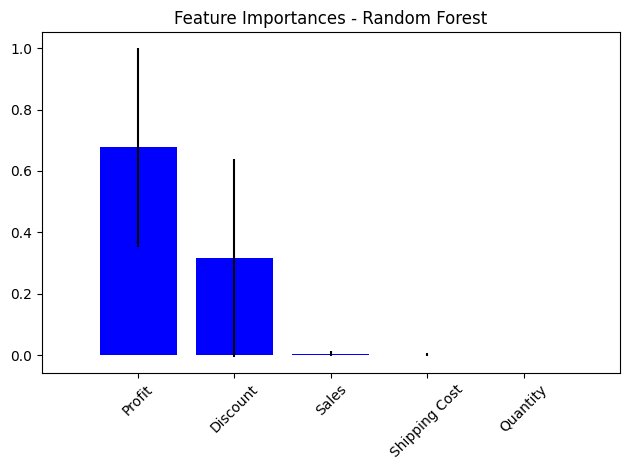

In [ ]:
# Inicializar el clasificador Random Forest
random_forest = RandomForestClassifier()

# Entrenar el modelo
random_forest.fit(X_train, y_train)

# Obtener las importancias de las características
importances = random_forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in random_forest.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Convertir X_train a DataFrame si no lo está
if not isinstance(X_train, pd.DataFrame):
    X_train = pd.DataFrame(X_train, columns=X.columns)

# Graficar las importancias de las características
plt.figure()
plt.title("Feature Importances - Random Forest")
plt.bar(range(X_train.shape[1]), importances[indices], color="b", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=45)  # Utilizar los nombres de las columnas
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

In [ ]:
# Define la cuadrícula de hiperparámetros
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100]  # Rango amplio de valores para C
}

# Inicializa el clasificador de Regresión Logística
logistic_regression = LogisticRegression()

# Configura Grid Search con validación cruzada de 10 folds y maximización de recall
grid_search = GridSearchCV(estimator=logistic_regression, param_grid=param_grid, cv=10, scoring='recall')

# Ahora puedes usar grid_search para ajustar a tus datos

In [ ]:
# Ajusta Grid Search a los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Obtén los mejores hiperparámetros encontrados
best_params = grid_search.best_params_
print("Mejores hiperparámetros encontrados:", best_params)

# Accede al mejor modelo ajustado
best_model = grid_search.best_estimator_

# Ahora puedes usar best_model para predecir o evaluar tus datos de prueba, por ejemplo:
y_pred = best_model.predict(X_test)


Mejores hiperparámetros encontrados: {'C': 100}


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
from sklearn.linear_model import LogisticRegression

# Crea un nuevo modelo de Regresión Logística con C=100
best_model = LogisticRegression(C=100)

# Ajusta el modelo con tus datos de entrenamiento
best_model.fit(X_train, y_train)


LogisticRegression(C=100)

Muestra de comparativa de valores reales y predichos:
       Real  Predicho
13622     0         0
16310     1         1
12045     0         0
25125     1         1
20416     0         0
43353     1         1
33440     0         0
34321     0         0
12679     0         0
22444     0         0

Classification Report:
              precision    recall  f1-score   support

       False       0.99      1.00      1.00      7776
        True       0.99      0.98      0.99      2482

    accuracy                           0.99     10258
   macro avg       0.99      0.99      0.99     10258
weighted avg       0.99      0.99      0.99     10258



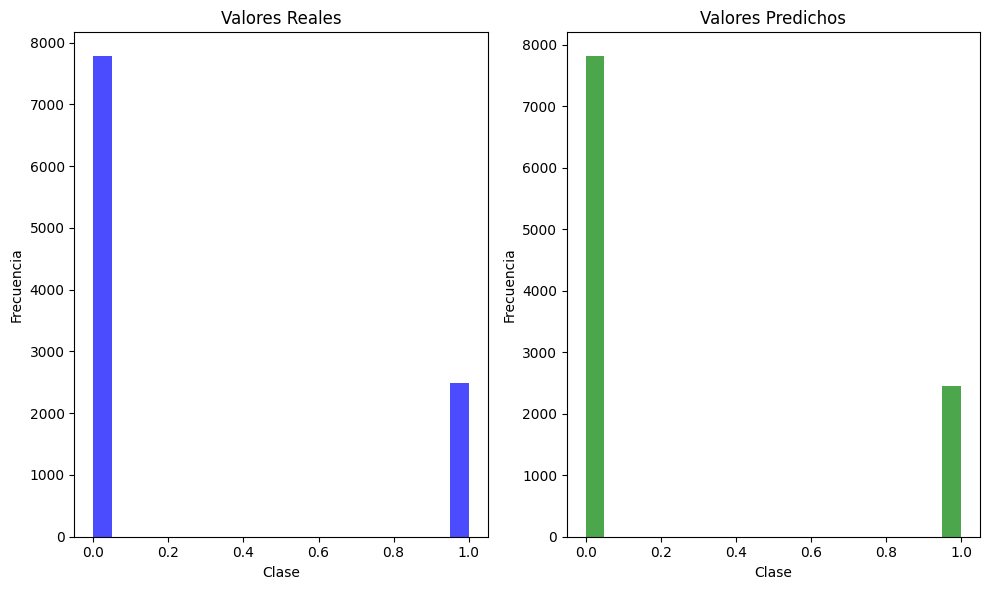

In [ ]:
# Suponiendo que y_test y y_pred son arrays de NumPy con valores booleanos
# Convertir a enteros
y_test_int = y_test.astype(int)
y_pred_int = y_pred.astype(int)

# Mostrar comparativa de valores reales y predichos
comparison = pd.DataFrame({'Real': y_test_int, 'Predicho': y_pred_int})

# Imprimir una muestra de la comparativa
print("Muestra de comparativa de valores reales y predichos:")
print(comparison.head(10))

# Mostrar el classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Visualizar comparativa gráfica de valores reales y predichos
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.title('Valores Reales')
plt.hist(y_test_int, color='blue', alpha=0.7, bins=20)
plt.xlabel('Clase')
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
plt.title('Valores Predichos')
plt.hist(y_pred_int, color='green', alpha=0.7, bins=20)
plt.xlabel('Clase')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()


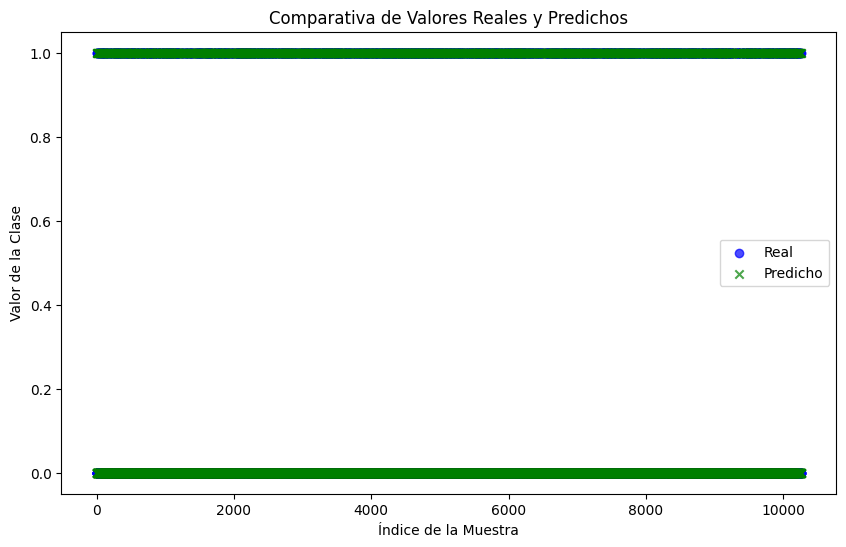

In [ ]:
# Grafico alterno Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Real', marker='o', alpha=0.7)
plt.scatter(range(len(y_pred)), y_pred, color='green', label='Predicho', marker='x', alpha=0.7)
plt.xlabel('Índice de la Muestra')
plt.ylabel('Valor de la Clase')
plt.title('Comparativa de Valores Reales y Predichos')
plt.legend()
plt.show()


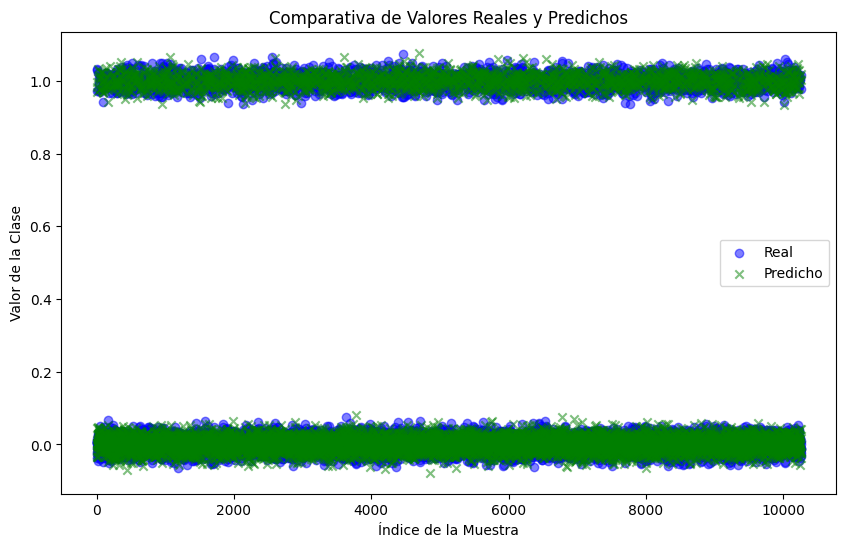

In [ ]:
# Añadir una pequeña dispersión aleatoria para evitar solapamientos
y_test_jitter02 = y_test + np.random.normal(0, 0.02, size=y_test.shape)
y_pred_jitter02 = y_pred + np.random.normal(0, 0.02, size=y_pred.shape)

plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test_jitter02, color='blue', label='Real', marker='o', alpha=0.5)
plt.scatter(range(len(y_pred)), y_pred_jitter02, color='green', label='Predicho', marker='x', alpha=0.5)
plt.xlabel('Índice de la Muestra')
plt.ylabel('Valor de la Clase')
plt.title('Comparativa de Valores Reales y Predichos')
plt.legend()
plt.show()
